## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
sns.set() #The default seaborn style to represent the graph

## Read the data into the notebook

In [3]:
df_ins = pd.read_csv('insurance.csv') # Reading the data set

In [4]:
df_ins.head(5)  #checking the head of the data frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
* Find the shape of the data
* Data type of each attribute
* Check the presence of missing values
* Summary of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns
* Pair plot that includes all the columns of the data frame

In [5]:
df_ins.info()  # Info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### - The data has 1338 rows with 7 columns. 2 integer type, 2 float type and 3 object type(Strings in the column) 

In [6]:
df_ins.isna().apply(pd.value_counts)   #null value check

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


### - There are no null values in any of the column

In [7]:
df_ins.describe().T   # five point summary of the continuous attributes

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### - Data looks legit as all the statistics seem reasonable .
#### - Looking at the age column, data looks like that most of the age consists of age population .
#### - Very few population have more than 2 children. 75% of the people have 2 or less children .
#### - The claimed amount is higly skewed as most people would require basic medi-care .

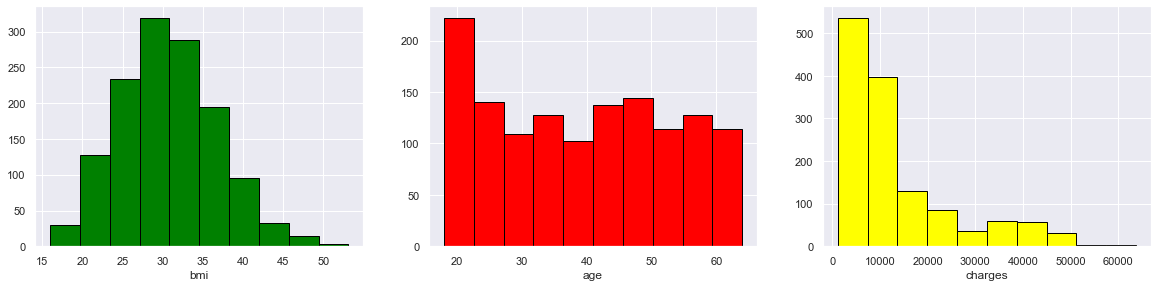

In [8]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_ins.bmi, color='green', edgecolor = 'black')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df_ins.age, color='red', edgecolor = 'black')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df_ins.charges, color='yellow', edgecolor = 'black')
plt.xlabel('charges')

plt.show()

#### - BMI is normally distributed 
#### - Age seems be be quite undistributed
#### - As seen in the previous step, charges are highly skewed

In [9]:
Skewness = pd.DataFrame({'skewness' : [stats.skew(df_ins.bmi),stats.skew(df_ins.age),stats.skew(df_ins.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


### - Skew of bmi is very less as seen in the previous step
### - age is uniformly distributed and there's hardly any skew
### - charges are highly skewed

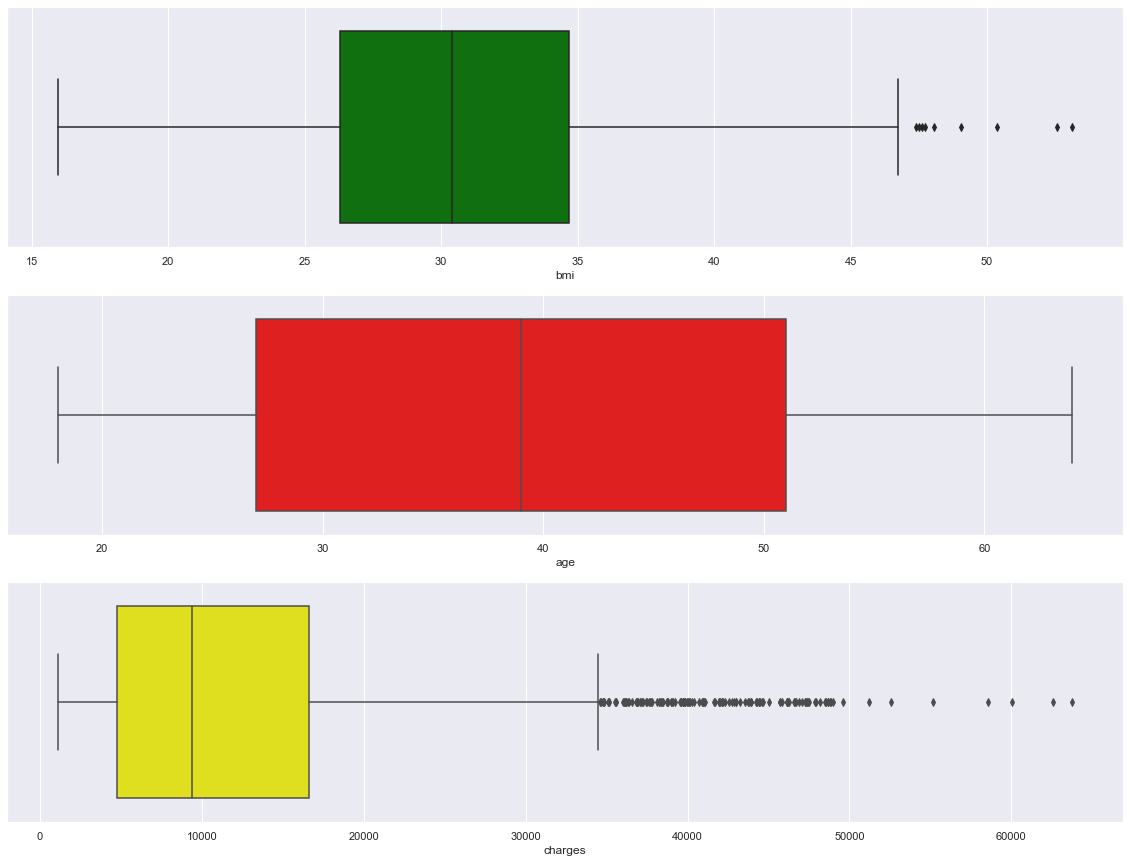

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df_ins.bmi, color='green')

plt.subplot(3,1,2)
sns.boxplot(x= df_ins.age, color='red')

plt.subplot(3,1,3)
sns.boxplot(x= df_ins.charges, color='yellow')

plt.show()

###  BMI has less outliers
###  Charges has more outliers

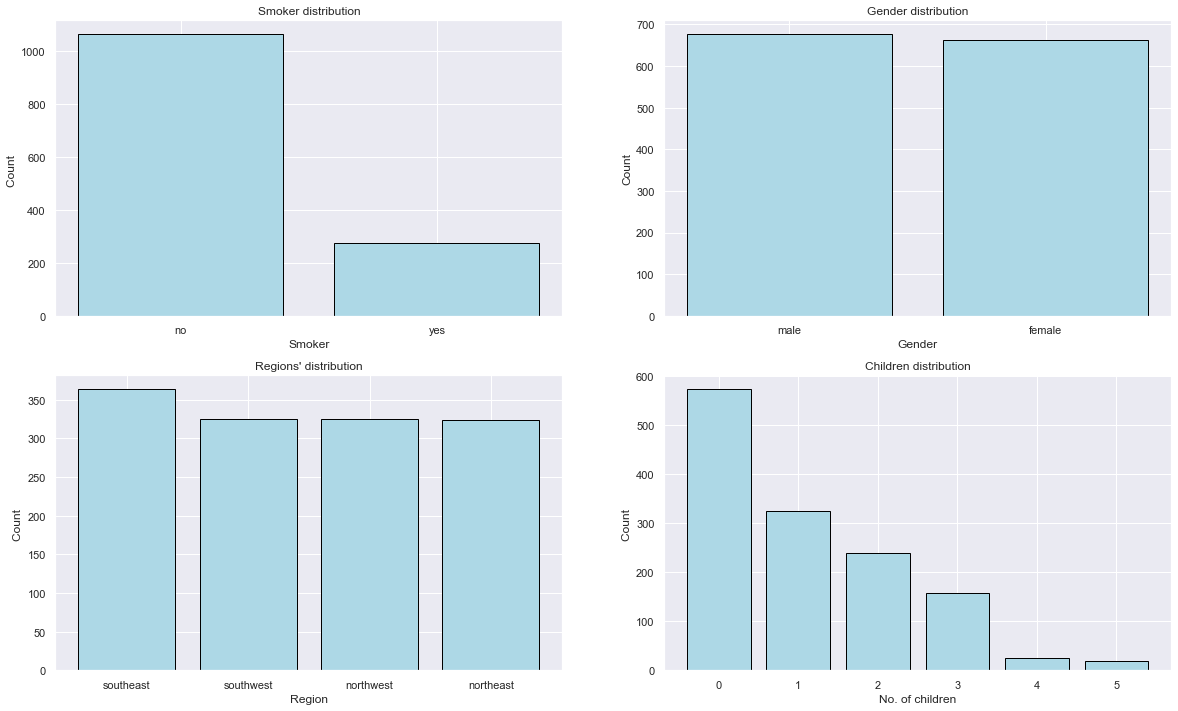

In [11]:
plt.figure(figsize=(20,25))


x = df_ins.smoker.value_counts().index    #Values for x-axis
y = [df_ins['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black')  #plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df_ins.sex.value_counts().index    #Values for x-axis
y1 = [df_ins['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black')  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df_ins.region.value_counts().index    #Values for x-axis
y2 = [df_ins['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black')  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df_ins.children.value_counts().index    #Values for x-axis
y3 = [df_ins['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black')  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()


### - There are a lot more non-smokers than there are less smokers in the data
### - Gender is also distributed uniformly
### - Most instances have less than 2 children and very few have 4 or 5 children

### Bi-variate distribution of every possible attribute pair

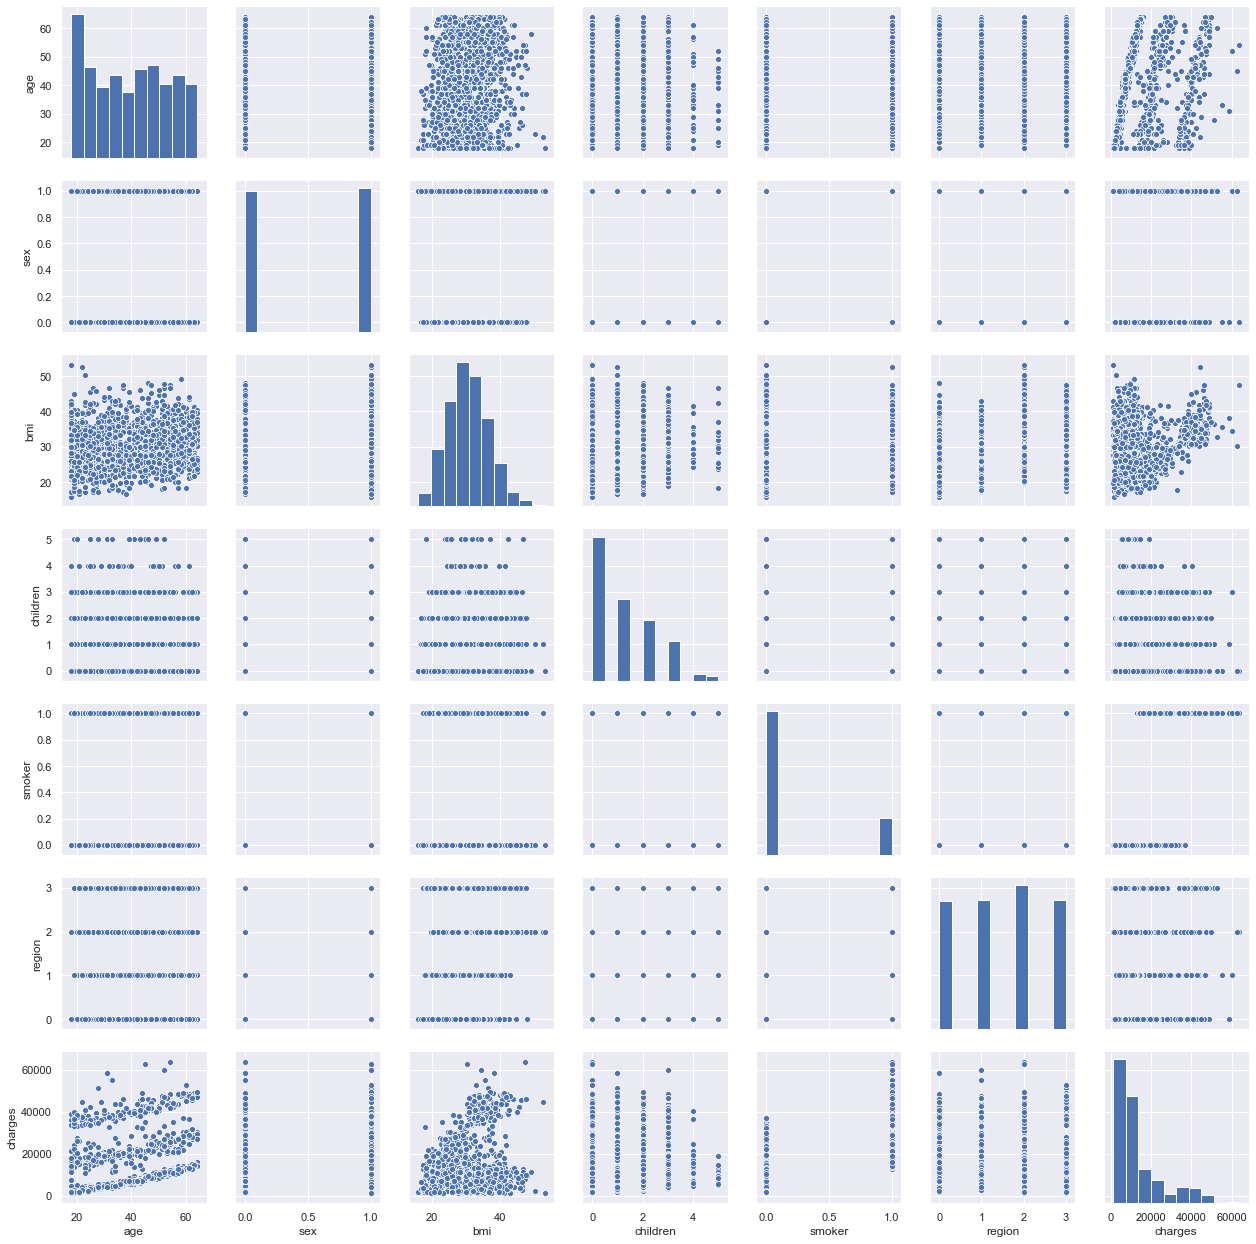

In [12]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = copy.deepcopy(df_ins)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

### - The only obvious correlation of 'charges' is with 'smoker' 
### - Looks like smokers claimed more money than non-smokers
### - There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

## Do charges of people who smoke differ significantly from the people who don't?

In [13]:
df_ins.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

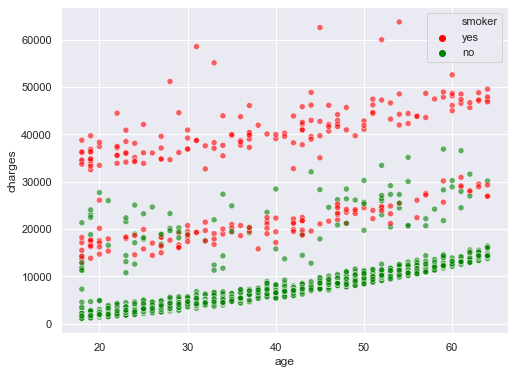

In [14]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df_ins.age, df_ins.charges,hue=df_ins.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

### - Visually the difference between charges of smokers and charges of non-smokers is apparent

In [15]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df_ins[df_ins.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df_ins[df_ins.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


##### * Smokers seem to claim significantly more money than non-smokers

## Does bmi of males differ significantly from that of females?

In [16]:
df_ins.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

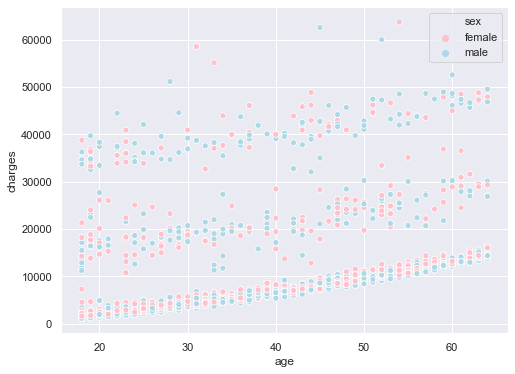

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_ins.age, df_ins.charges,hue=df_ins.sex,palette= ['pink','lightblue'] )
plt.show()

### - Visually, there is no apparent relation between gender and charges

In [18]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df_ins[df_ins.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df_ins[df_ins.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


##### * bmi of both the genders are identical

## Is the proportion of smokers significantly different in different genders?

In [19]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df_ins['sex'],df_ins['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


##### * Proportion of smokers in males is significantly different from that of the females

In [20]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df_ins['smoker'], df_ins['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


##### * Smoking haboits of people of different regions are similar

## Is the distribution of bmi across women with no children, one child and two children, the same ?

In [21]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df_ins[df_ins['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


### BMI is not changed by the number of children a women has